In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import seaborn as sns 
sns.set()

In [2]:
pd.set_option('display.max_columns', None)


In [3]:
data = pd.read_csv('Blood_samples_dataset_balanced.csv')
data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,0.034129,0.071774,0.185596,0.071455,0.653472,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,0.571162,0.839271,0.580903,0.556037,0.477742,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,0.582170,0.577423,0.045782,0.663642,0.088940,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,0.620258,0.169059,0.139289,0.160496,0.406528,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,0.184371,0.580175,0.118461,0.005579,0.414407,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [4]:
corr = data.corr()

C:\Users\salvi\AppData\Local\Temp\ipykernel_31812\1351907255.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


In [5]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_table_styles(magnify())

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
Glucose,1.000,0.202,0.126,0.095,0.033,-0.045,0.166,-0.001,-0.155,0.053,0.089,0.363,0.009,0.089,-0.145,0.047,0.103,-0.140,-0.005,-0.052,-0.026,-0.221,0.222,0.211
Cholesterol,0.202,1.000,0.208,0.015,0.011,0.122,0.091,-0.075,-0.299,0.148,0.135,-0.124,-0.169,-0.026,0.168,0.014,0.168,0.147,0.058,0.156,-0.154,-0.022,-0.071,-0.212
Hemoglobin,0.126,0.208,1.000,0.122,0.060,0.053,-0.017,-0.131,0.188,0.052,-0.167,-0.037,0.181,0.138,0.155,0.052,0.303,-0.011,0.020,-0.096,0.003,-0.059,-0.096,-0.049
Platelets,0.095,0.015,0.122,1.000,-0.081,0.042,-0.187,0.131,-0.079,-0.015,-0.058,-0.002,0.032,0.072,-0.242,0.099,-0.205,-0.196,-0.098,0.081,-0.096,-0.020,-0.015,-0.020
White Blood Cells,0.033,0.011,0.060,-0.081,1.000,0.068,0.250,-0.011,0.014,-0.042,-0.142,0.075,-0.035,-0.073,0.091,0.035,-0.031,-0.038,0.032,0.153,0.198,0.081,-0.123,0.022
Red Blood Cells,-0.045,0.122,0.053,0.042,0.068,1.000,-0.085,-0.155,-0.020,-0.123,-0.206,0.021,0.002,-0.101,0.067,0.149,0.169,0.253,0.179,-0.191,0.037,-0.111,-0.105,-0.176
Hematocrit,0.166,0.091,-0.017,-0.187,0.250,-0.085,1.000,0.055,-0.100,-0.025,-0.064,0.217,0.007,-0.071,-0.113,-0.028,-0.033,0.037,-0.035,-0.108,-0.100,-0.019,0.198,-0.079
Mean Corpuscular Volume,-0.001,-0.075,-0.131,0.131,-0.011,-0.155,0.055,1.000,0.002,0.141,0.177,-0.110,0.021,-0.044,-0.144,-0.065,-0.197,-0.097,0.015,-0.003,-0.168,-0.001,0.137,-0.102
Mean Corpuscular Hemoglobin,-0.155,-0.299,0.188,-0.079,0.014,-0.020,-0.100,0.002,1.000,-0.022,-0.043,0.014,0.022,0.068,0.065,-0.151,0.181,-0.015,-0.102,0.088,0.044,-0.162,-0.213,0.066
Mean Corpuscular Hemoglobin Concentration,0.053,0.148,0.052,-0.015,-0.042,-0.123,-0.025,0.141,-0.022,1.000,-0.120,-0.122,-0.106,-0.166,0.159,0.157,0.147,-0.093,-0.223,0.050,-0.076,0.067,0.091,0.044


In [6]:
data['Disease'].value_counts()

Anemia      623
Healthy     556
Diabetes    540
Thalasse    509
Thromboc    123
Name: Disease, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Disease']=le.fit_transform(data['Disease'])

In [27]:
test = pd.read_csv('blood_samples_dataset_test.csv')
test = test[test['Disease']!='Heart Di']
test['Disease']=le.transform(test['Disease'])

In [28]:
test

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,0.645755,0.070888,0.616684,0.168031,0.970168,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,3
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,0.353929,0.681551,0.498084,0.216581,0.517805,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,1
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,0.819216,0.542478,0.023462,0.744379,0.944932,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,1
6,0.677636,0.435037,0.572571,0.965847,0.010580,0.753719,0.262138,0.789804,0.541149,0.550569,0.741724,0.835773,0.942370,0.968535,0.884907,0.196416,0.141203,0.355437,0.468168,0.493548,0.213971,0.059427,0.836447,0.231356,1
7,0.105103,0.177558,0.169041,0.679138,0.886839,0.714977,0.197501,0.778653,0.319864,0.285914,0.857972,0.363073,0.882426,0.874039,0.756753,0.259719,0.305473,0.867800,0.213141,0.094877,0.120487,0.211855,0.376829,0.645990,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,0.596137,0.071545,0.654680,0.980213,0.503338,0.987548,0.775286,0.201622,0.263525,0.356106,0.158686,0.868034,0.866356,0.018791,0.624223,0.808920,0.798004,0.976612,0.552450,0.382807,0.754216,0.234421,0.355834,0.132999,1
481,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,0.845992,0.413017,0.433664,0.652334,0.763585,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038,1
483,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,0.470921,0.240658,0.452257,0.485808,0.034523,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874,0
484,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,0.430987,0.390158,0.890811,0.247728,0.366494,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526,1


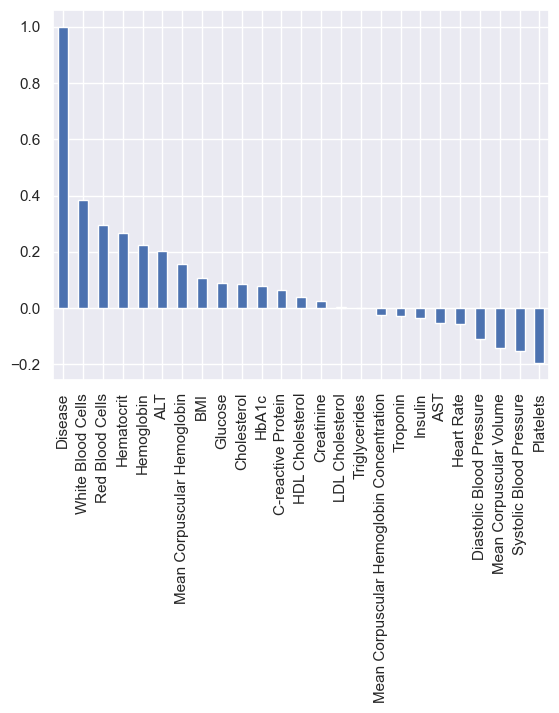

In [8]:
data.corr()['Disease'].sort_values(ascending=False).plot(kind='bar')
plt.show()

In [10]:
data.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [11]:
data.to_csv('train_data')

In [29]:
test.to_csv('test_data')